In [1]:
import cv2
from matplotlib import pyplot as plt
import glob
import numpy as np
from math import floor
# %matplotlib notebook

In [2]:
# pct 3 (V >= 0.4) & (0.2 < S < 0.6) & (0 < H < 25 | 335 < H <= 360)
# tradus fct 1 = 0.4 * 255
# tradus fct 1 = 0.2 * 255
# tradus fct 1 = 0.6 * 255
# tradus fct 1 = 25 * 0.5
# tradus fct 1 = 335 * 0.2
# tradus fct 1 = 360 * 0.2



In [3]:
def imread(path):
    return cv2.imread(path)[:,:,::-1]

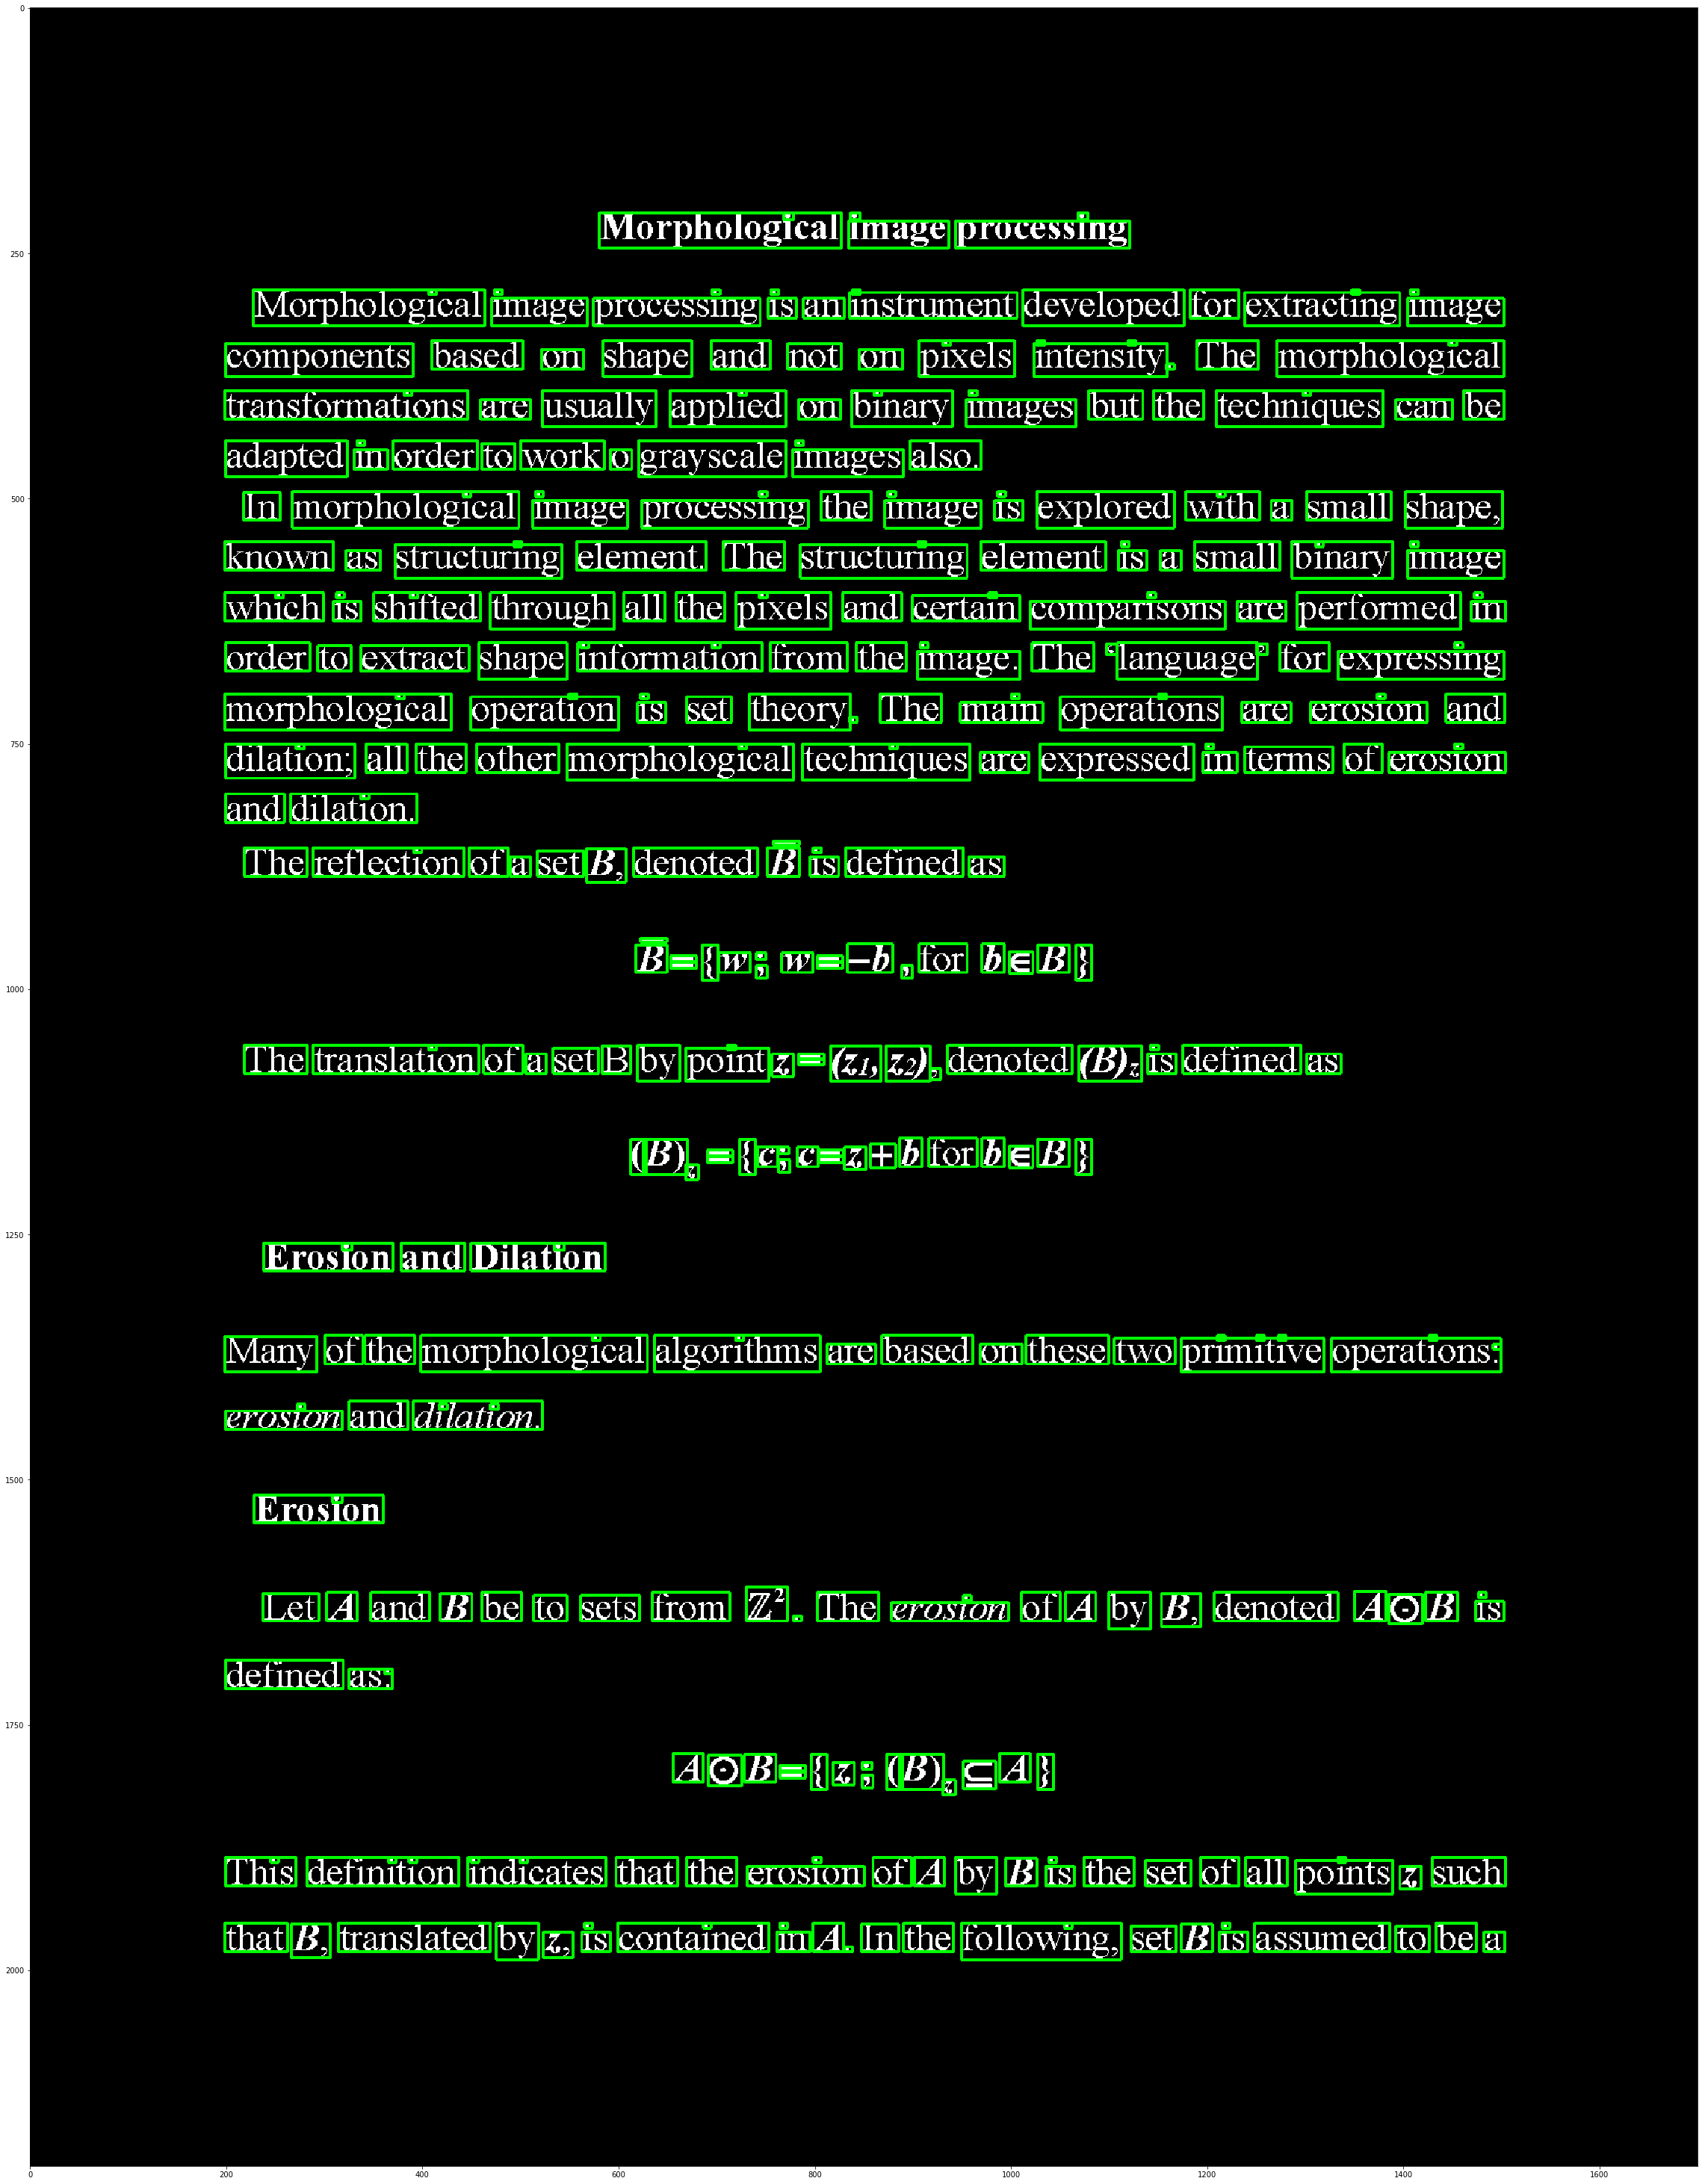

In [4]:
img_path = glob.glob('images\Lab_3_DIP.tiff')[0]
img = imread(img_path)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
# gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
# thresh = cv2.dilate(thresh,None,iterations = 3)
# thresh = cv2.erode(thresh,None,iterations = 2)

# Find the contours

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 3))
dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)


contours,hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2:]

cv2.imwrite("image_processed.png",img)
img = img.copy()
# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)
fig=plt.figure(figsize=(40, 60))
# Finally show the image
# plt.imshow(img)
plt.imshow(thresh_color)


In [5]:
def get_leftmost_contour(contours):
    leftmost_cnt = None
    leftmost_x = 20000
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if leftmost_x > x:
            leftmost_cnt = cnt
            leftmost_x = x
    return leftmost_cnt
    

In [6]:
def get_first_contour(word):
    thresh_word = cv2.adaptiveThreshold(word,255,1,1,11,2)
    kernel = np.ones((15,1), np.uint8)
    dilation_letter = cv2.dilate(thresh_word, kernel, iterations = 1)
#     plt.figure()
#     plt.imshow(dilation_letter)
    contours_letter,hierarchy_letter = cv2.findContours(dilation_letter, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
    word_color = cv2.cvtColor(word,cv2.COLOR_GRAY2BGR)
    cnt = get_leftmost_contour(contours_letter)
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(word_color,(x,y),(x+w,y+h),(0,255,0),2)
    return word_color, cnt

In [7]:
from keras.models import load_model

C:\Users\iustin.petrisor\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[1.8276157e-11]]
[[6.696811e-05]]
[[0.]]
[[1.8257377e-11]]
[[0.]]
[[1.10417944e-14]]
[[5.316879e-31]]
[[0.00165559]]
[[7.612121e-25]]
[[0.]]
[[2.3675864e-20]]
[[0.]]
[[5.2104815e-06]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[5.9298894e-05]]
[[0.46520364]]
[[0.46520364]]
[[1.]]
[[1.]]
[[1.8276157e-11]]
[[0.00087599]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[8.069075e-31]]
[[7.93649e-17]]
[[0.37574238]]
[[4.845192e-24]]
[[0.]]
[[0.00251707]]
[[1.3028158e-27]]
[[0.00165559]]
[[7.612121e-25]]
[[0.00165559]]
[[1.8276157e-11]]
[[5.2104815e-06]]
[[1.]]
[[1.]]
[[0.46520364]]
[[0.46520364]]
[[1.8276157e-11]]
[[8.069075e-31]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.8276157e-11]]
[[0.46520364]]
[[0.46520364]]
[[0.5183097]]
[[0.5183097]]
[[1.8276157e-11]]
[[9.777785e-23]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[0.00120306]]
[[1.8276157e-11]]
[[2.4940257e-38]]
[[7.27733e-15]]
[[1.1281831e-24]]
[[5.295158e-17]]
[[5.295158e-17]]
[[3.6615845e-14]]
[[4.845192e-24]]
[[1.34704615e-27]]
[[0.9999999]]
[

C:\Users\iustin.petrisor\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[[0.]]
[[5.2104815e-06]]
[[1.]]
[[1.]]
[[0.744998]]
[[0.744998]]
[[0.05894398]]
[[3.6615845e-14]]
[[0.]]
[[0.9999999]]
[[0.9999999]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[0.99999905]]
[[0.99999905]]
[[5.2104815e-06]]
[[1.8276157e-11]]
[[1.]]
[[1.]]
[[0.00269609]]
[[0.9999927]]
[[0.9999927]]
[[1.3028158e-27]]
[[0.4705233]]
[[0.4705233]]
[[0.16207688]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[1.8276157e-11]]
[[6.5049843e-10]]
[[0.]]
[[1.8276157e-11]]
[[0.2618831]]
[[1.8276157e-11]]
[[0.00024888]]
[[7.940726e-18]]
[[1.]]
[[1.]]
[[3.6615845e-14]]
[[0.]]
[[1.8202398e-08]]
[[3.6615845e-14]]
[[0.]]
[[2.1188642e-17]]
[[1.1281831e-24]]
[[4.101043e-19]]
[[4.101043e-19]]
[[4.101043e-19]]
[[4.101043e-19]]
[[4.845192e-24]]
[[3.4253932e-07]]
[[3.6615845e-14]]
[[3.4253932e-07]]
[[2.4071383e-08]]
[[4.75672e-31]]
[[6.435286e-17]]
[[7.612121e-25]]
[[8.6741005e-18]]
[[2.3675864e-20]]
[[0.3789319]]
[[1.0071206e-30]]
[[4.267996e-09]]
[[1.0071206e-30]]
[[3.376269e-09]]
[[1.8

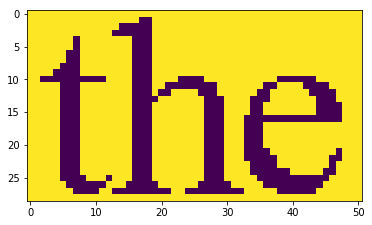

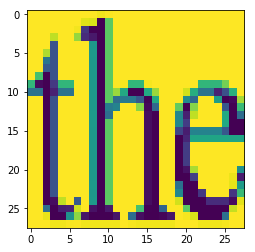

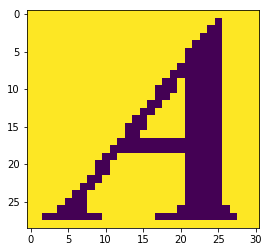

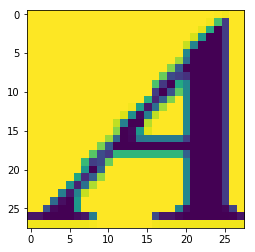

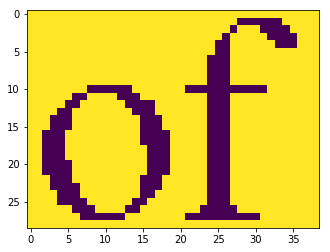

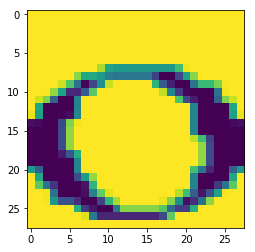

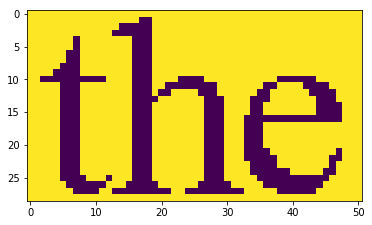

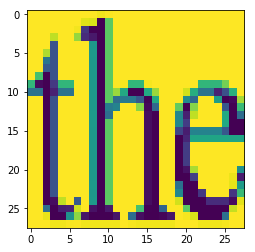

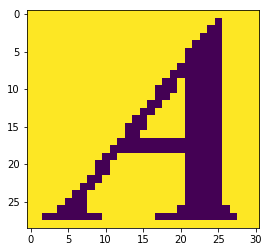

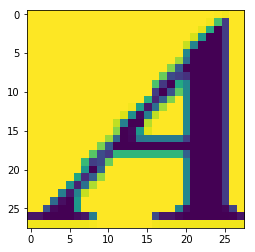

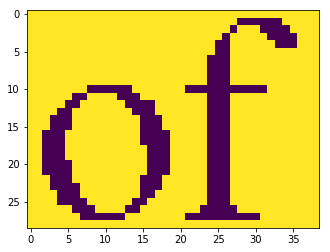

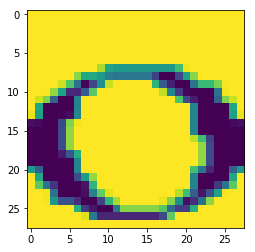

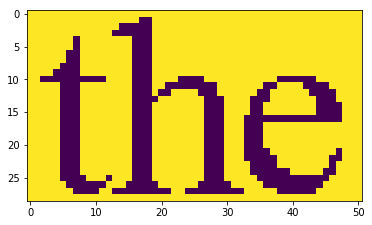

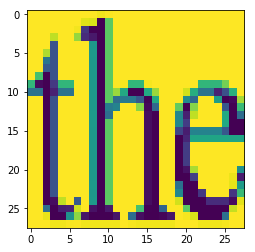

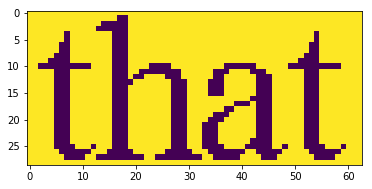

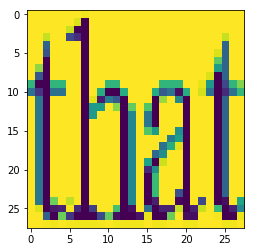

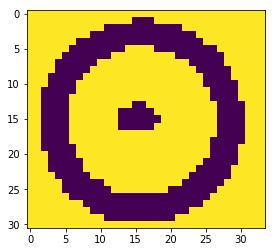

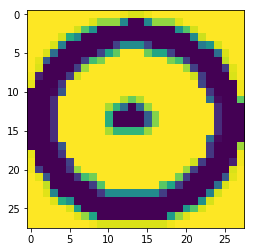

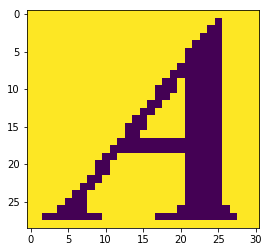

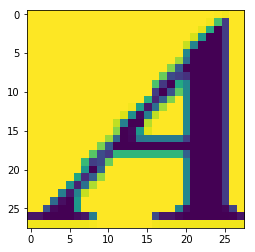

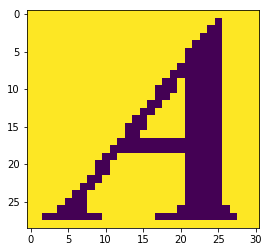

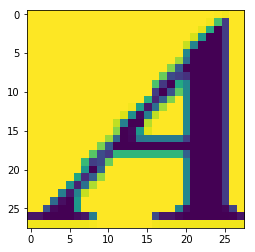

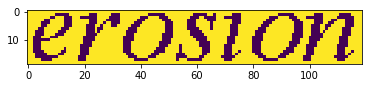

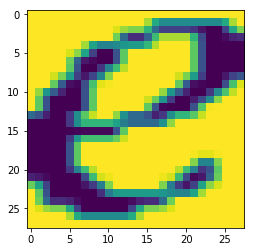

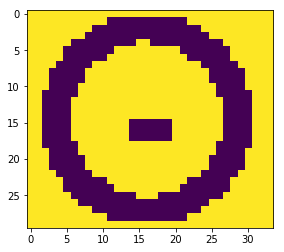

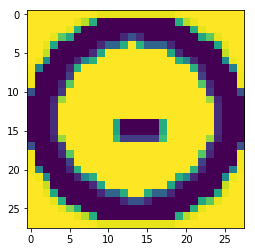

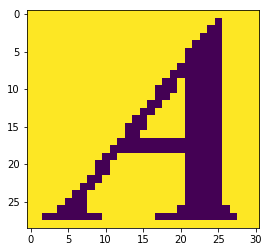

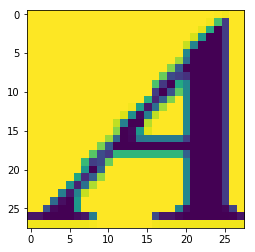

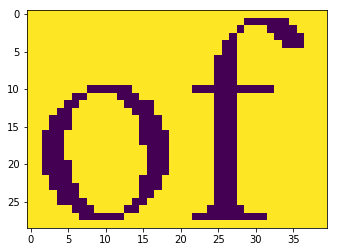

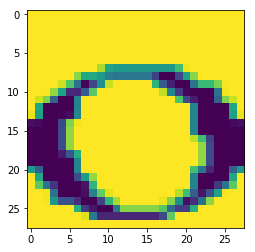

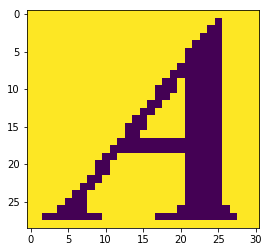

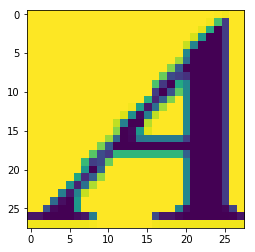

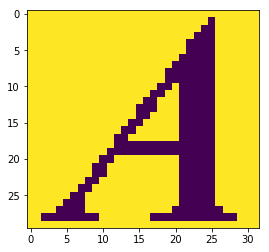

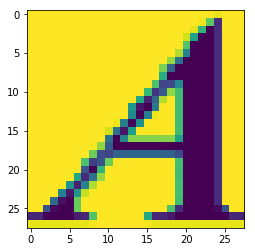

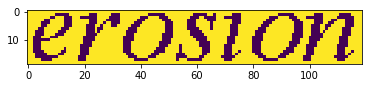

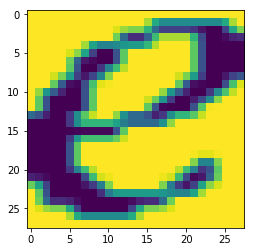

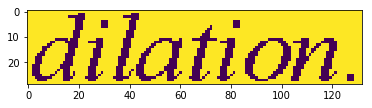

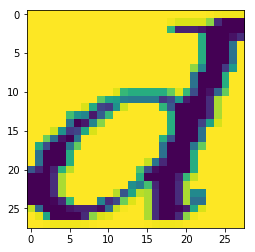

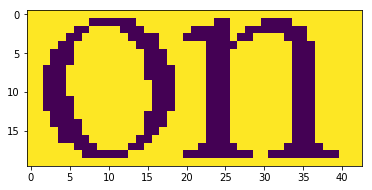

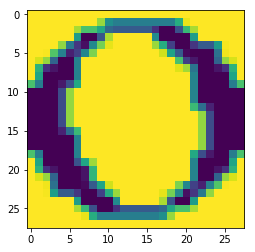

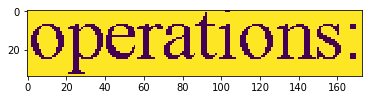

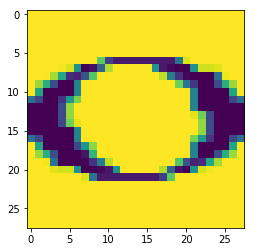

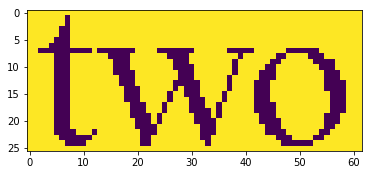

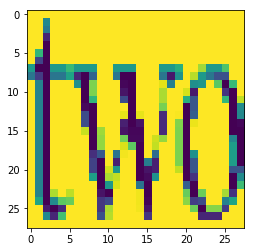

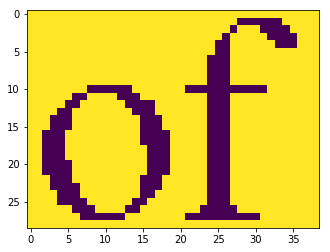

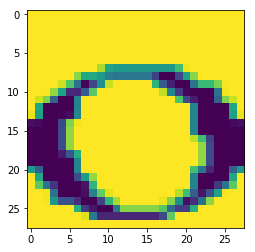

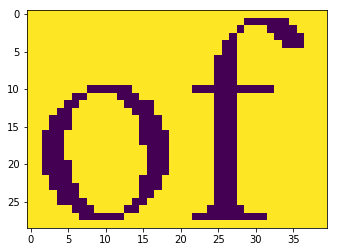

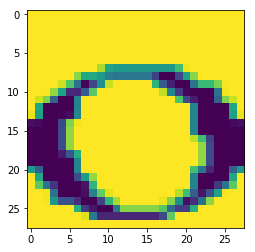

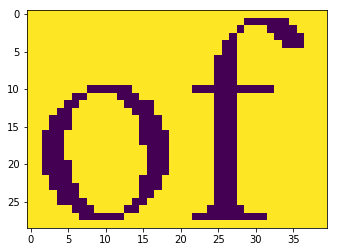

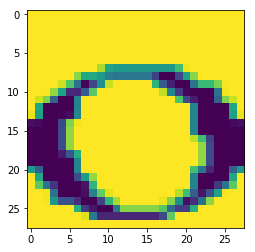

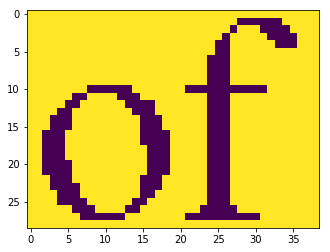

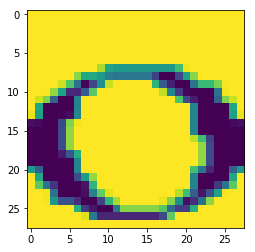

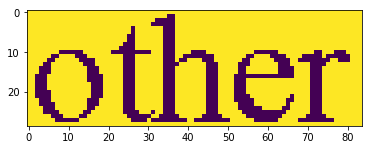

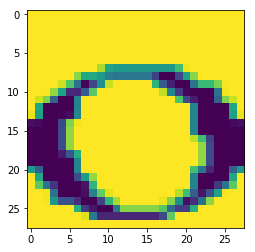

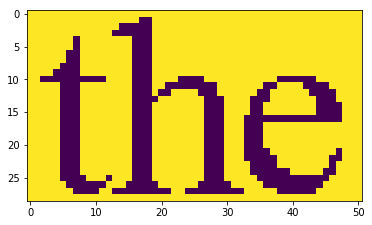

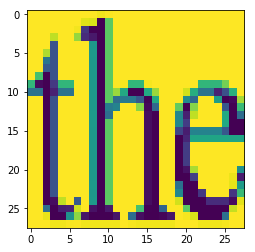

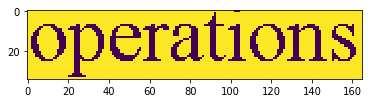

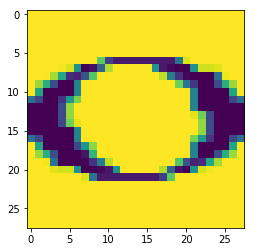

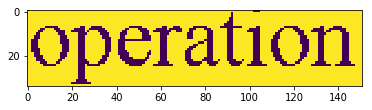

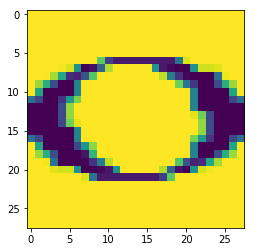

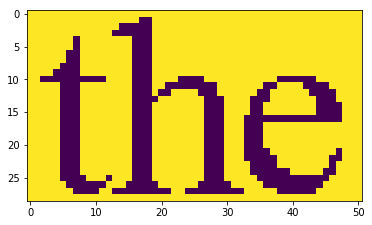

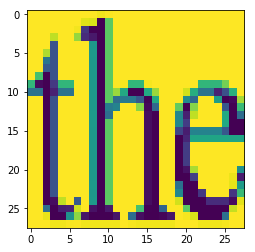

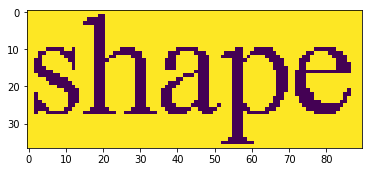

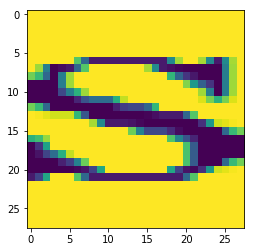

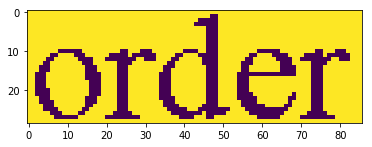

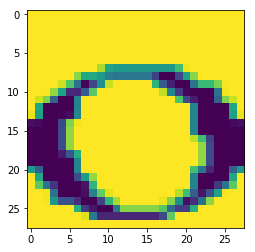

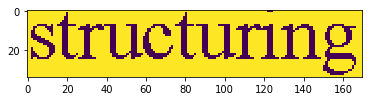

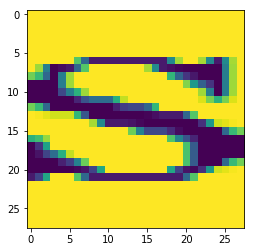

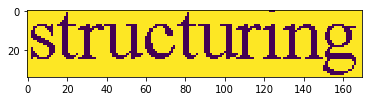

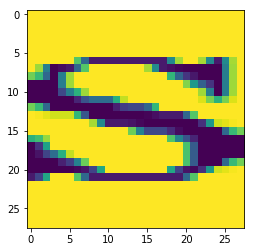

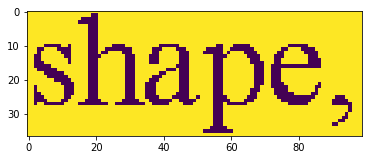

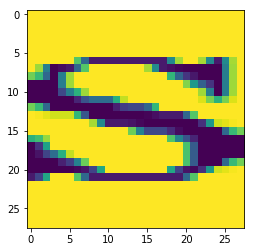

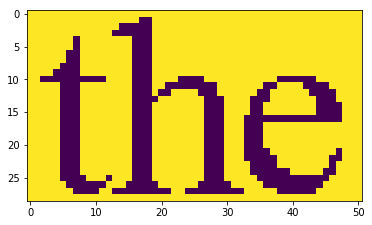

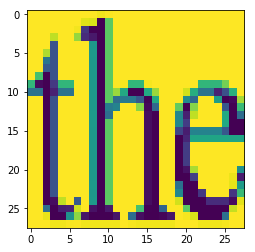

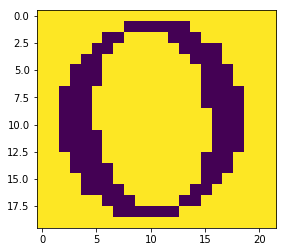

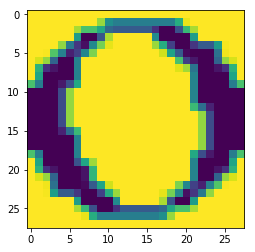

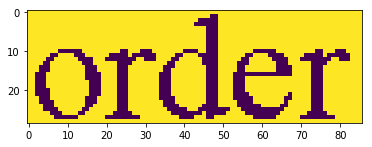

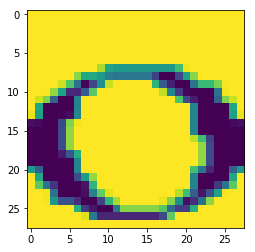

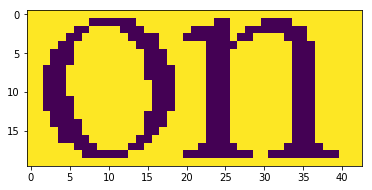

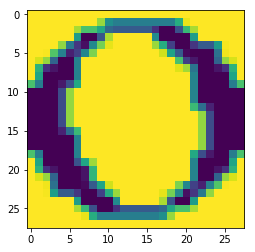

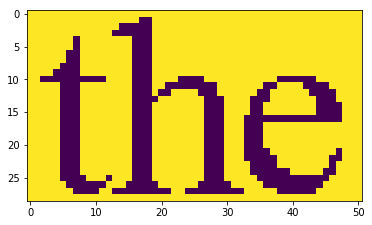

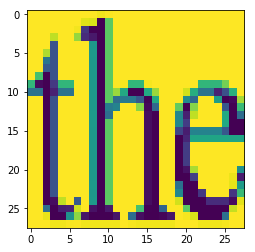

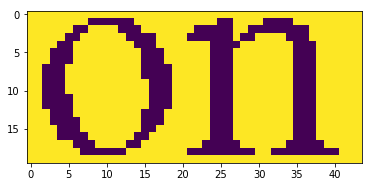

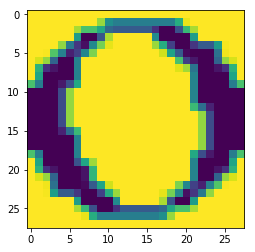

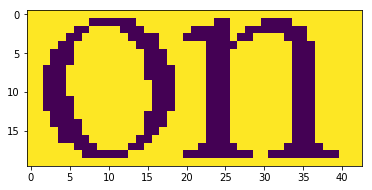

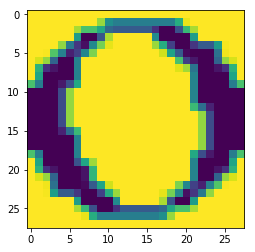

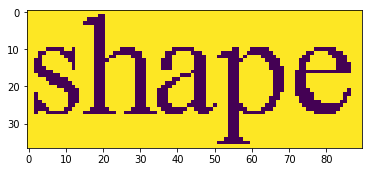

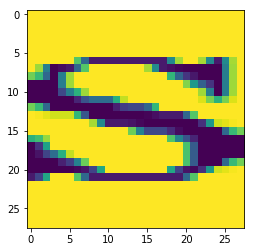

In [30]:
model = load_model('letter.h5')

x,y,w,h = cv2.boundingRect(contours[8])
word = gray[y:y+h, x:x+w].copy()

i = 1
l = int(len(contours) / 2)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    word = gray[y:y+h, x:x+w].copy()
    first_contour_image, first_contour = get_first_contour(word)
    #plt.imshow(first_contour_image)
    x,y,w,h = cv2.boundingRect(first_contour)
    letter = word[y:y+h, x:x+w].copy()
    img_orig =  cv2.resize(letter, (28, 28)) 
    img = img_orig.reshape(1,28,28,1)
    
    prediction = model.predict(img)
    print(prediction)
    if(prediction > 0.45):
        print(prediction)
        plt.figure()
        plt.imshow(word)
        plt.figure()
        plt.imshow(img_orig)
        #print(y_classes)


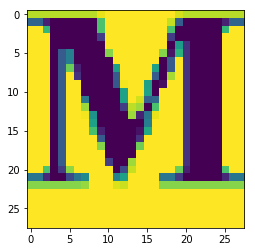

In [9]:
plt.imshow(img_orig)

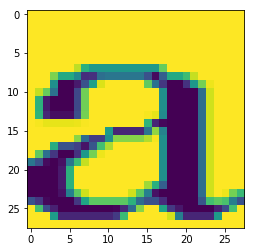

In [10]:
word = gray[y:y+h, x:x+w].copy()

cnt  = contours[12]
x,y,w,h = cv2.boundingRect(cnt)
word = gray[y:y+h, x:x+w].copy()
first_contour_image, first_contour = get_first_contour(word)
#fig.add_subplot(l, 2, i)
x,y,w,h = cv2.boundingRect(first_contour)
letter = word[y:y+h, x:x+w].copy()
plt.figure()
img =  cv2.resize(letter, (28, 28)) 


plt.imshow(img)
img = img.reshape(1,28,28,1)
prediction = model.predict(img)
#plt.show()

In [11]:
y_classes = prediction.argmax(axis=-1)
y_classes

array([0], dtype=int64)

In [12]:
img.shape

(1, 28, 28, 1)